# Model Training Visualizations

This notebook visualizes the training history and test results from the model training.

In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [13]:
# Load training history
with open('checkpoints/training_history.json', 'r') as f:
    training_history = json.load(f)

# Load test results
with open('checkpoints/test_results.json', 'r') as f:
    test_results = json.load(f)

print("Training History Keys:", training_history.keys())
print("Test Results Keys:", test_results.keys())
print(f"\nNumber of epochs: {len(training_history['train_loss'])}")

Training History Keys: dict_keys(['train_loss', 'train_mae', 'train_rmse', 'train_r2', 'val_loss', 'val_mae', 'val_rmse', 'val_r2', 'lr'])
Test Results Keys: dict_keys(['test_loss', 'test_mae', 'test_rmse', 'test_r2', 'best_epoch', 'best_val_loss'])

Number of epochs: 2


## Test Results Summary

In [16]:
# Display test results as a table
test_df = pd.DataFrame({
    'Metric': ['Test Loss', 'Test MAE', 'Test RMSE', 'Best Epoch', 'Best Val Loss', 'Test Accuracy'],
    'Value': [
        f"{test_results['test_loss']:.6f}",
        f"{test_results['test_mae']:.6f}",
        f"{test_results['test_rmse']:.6f}",
        # f"{test_results['test_r2']:.6f}",
        test_results['best_epoch'],
        f"{test_results['best_val_loss']:.6f}",
        f"{(1 - test_results['test_loss']) * 100:.2f}%"
    ]
})

print("="*50)
print("TEST RESULTS SUMMARY")
print("="*50)
print(test_df.to_string(index=False))
print("="*50)

TEST RESULTS SUMMARY
       Metric    Value
    Test Loss 0.078286
     Test MAE 0.219803
    Test RMSE 0.245697
   Best Epoch        1
Best Val Loss 0.073361
Test Accuracy   92.17%


## Training and Validation Loss

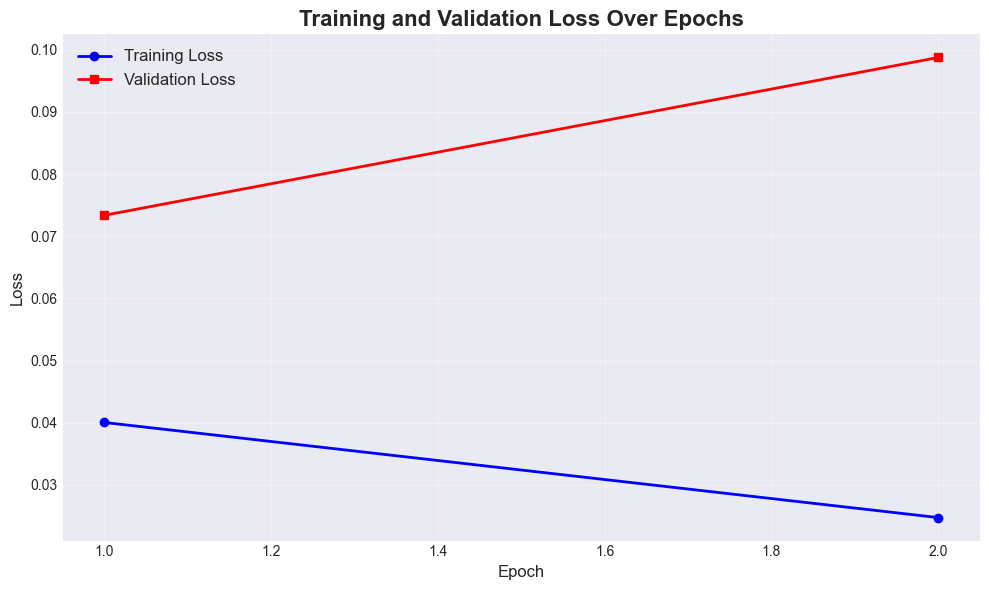

In [3]:
epochs = range(1, len(training_history['train_loss']) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_history['train_loss'], 'b-o', label='Training Loss', linewidth=2)
plt.plot(epochs, training_history['val_loss'], 'r-s', label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss Over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Test Results Visualization

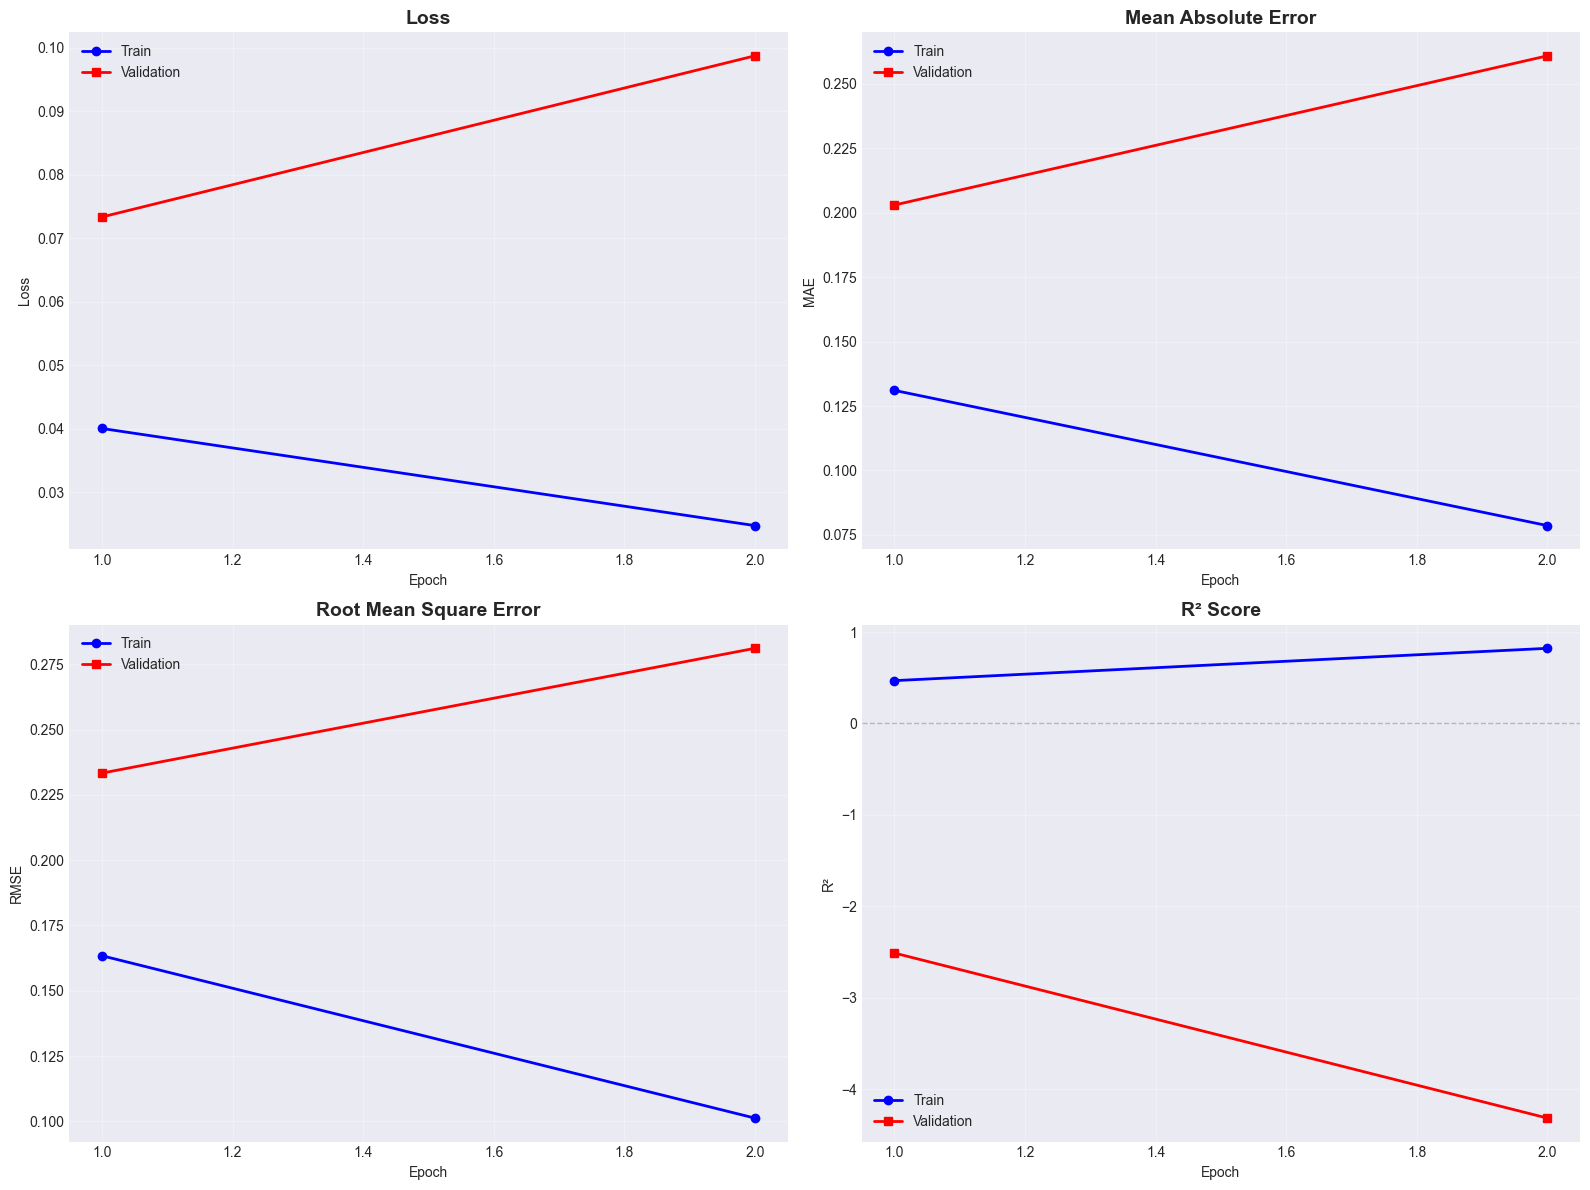

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Loss
axes[0, 0].plot(epochs, training_history['train_loss'], 'b-o', label='Train', linewidth=2)
axes[0, 0].plot(epochs, training_history['val_loss'], 'r-s', label='Validation', linewidth=2)
axes[0, 0].set_title('Loss', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# MAE
axes[0, 1].plot(epochs, training_history['train_mae'], 'b-o', label='Train', linewidth=2)
axes[0, 1].plot(epochs, training_history['val_mae'], 'r-s', label='Validation', linewidth=2)
axes[0, 1].set_title('Mean Absolute Error', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# RMSE
axes[1, 0].plot(epochs, training_history['train_rmse'], 'b-o', label='Train', linewidth=2)
axes[1, 0].plot(epochs, training_history['val_rmse'], 'r-s', label='Validation', linewidth=2)
axes[1, 0].set_title('Root Mean Square Error', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# R²
axes[1, 1].plot(epochs, training_history['train_r2'], 'b-o', label='Train', linewidth=2)
axes[1, 1].plot(epochs, training_history['val_r2'], 'r-s', label='Validation', linewidth=2)
axes[1, 1].set_title('R² Score', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('R²')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

## Learning Rate

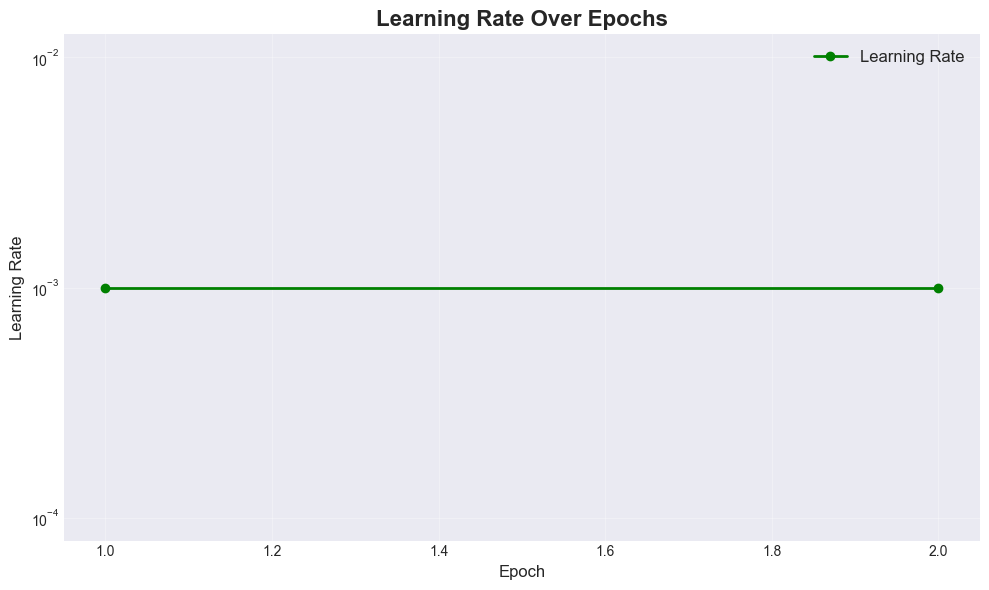

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_history['lr'], 'g-o', label='Learning Rate', linewidth=2)
plt.title('Learning Rate Over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Learning Rate', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.show()

## R² Score

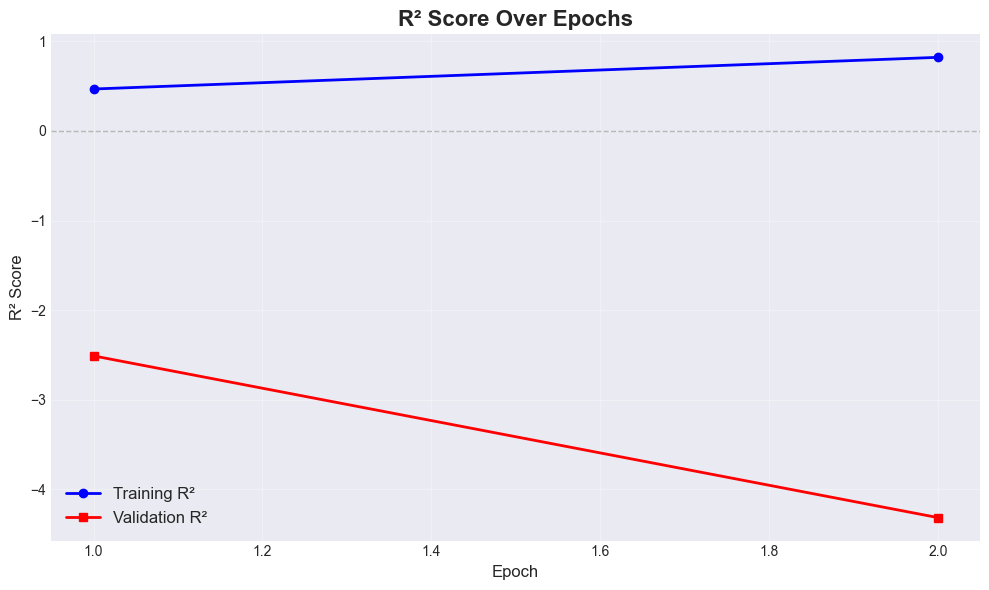

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_history['train_r2'], 'b-o', label='Training R²', linewidth=2)
plt.plot(epochs, training_history['val_r2'], 'r-s', label='Validation R²', linewidth=2)
plt.title('R² Score Over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.tight_layout()
plt.show()

## Root Mean Square Error (RMSE)

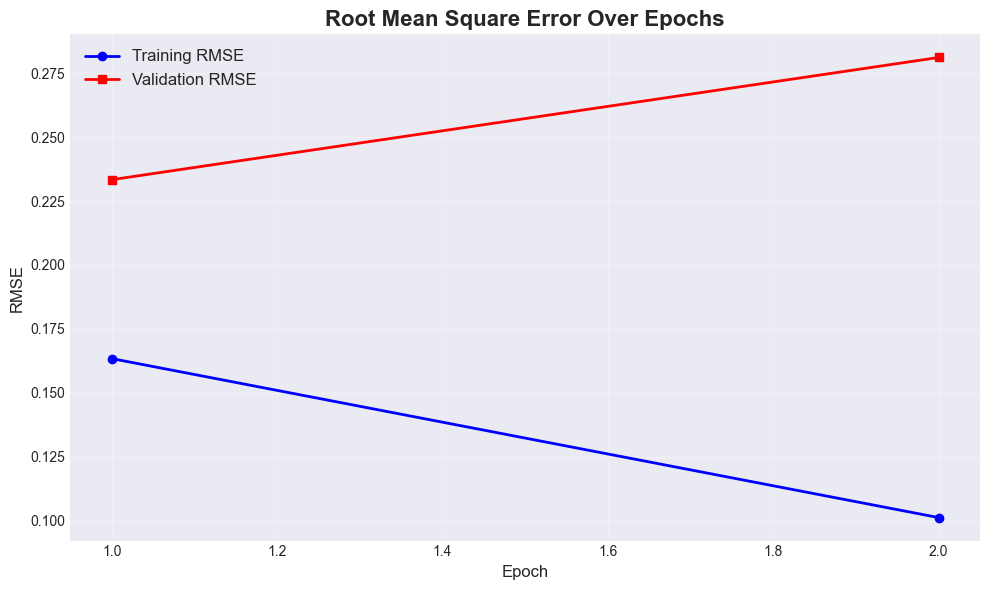

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_history['train_rmse'], 'b-o', label='Training RMSE', linewidth=2)
plt.plot(epochs, training_history['val_rmse'], 'r-s', label='Validation RMSE', linewidth=2)
plt.title('Root Mean Square Error Over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Mean Absolute Error (MAE)

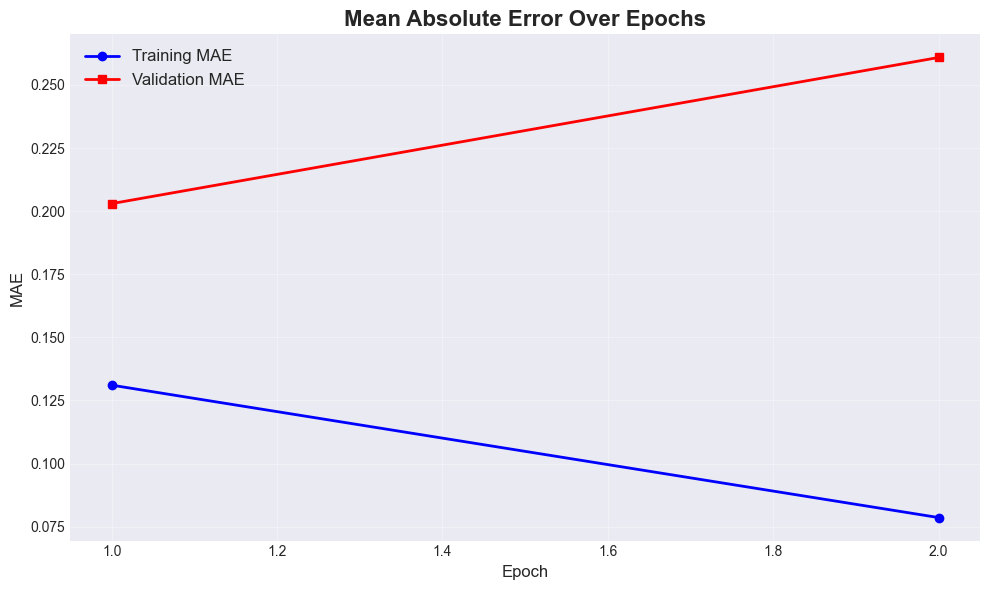

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_history['train_mae'], 'b-o', label='Training MAE', linewidth=2)
plt.plot(epochs, training_history['val_mae'], 'r-s', label='Validation MAE', linewidth=2)
plt.title('Mean Absolute Error Over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## All Metrics Combined

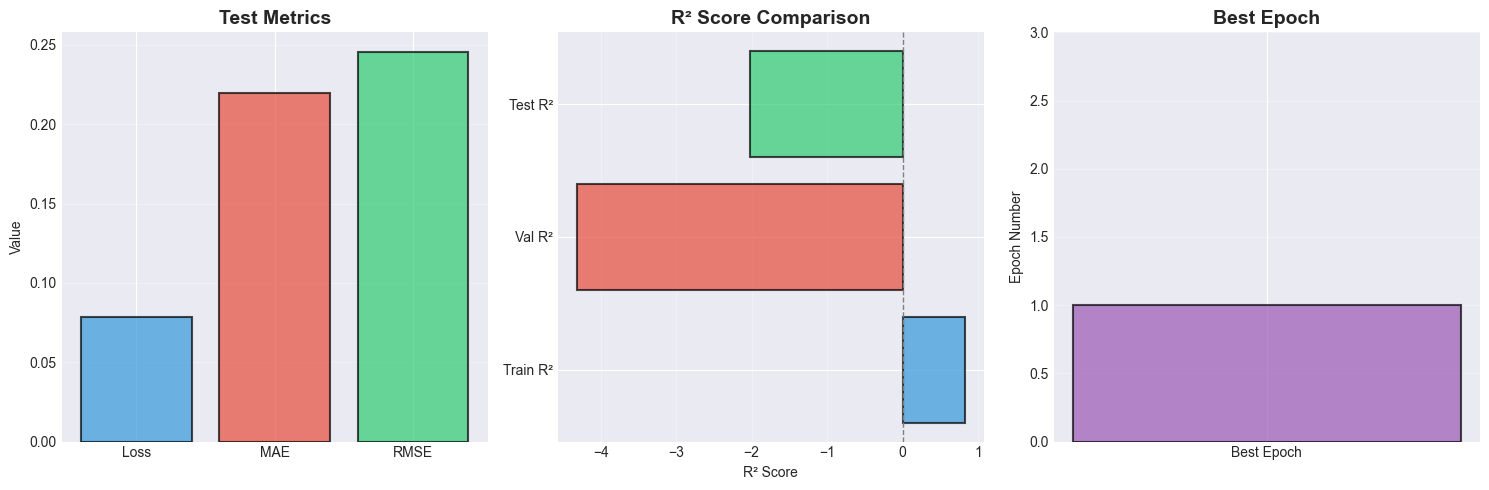

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Test metrics bar chart
metrics = ['Loss', 'MAE', 'RMSE']
values = [test_results['test_loss'], test_results['test_mae'], test_results['test_rmse']]
colors = ['#3498db', '#e74c3c', '#2ecc71']

axes[0].bar(metrics, values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_title('Test Metrics', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3, axis='y')

# R² Score comparison
axes[1].barh(['Train R²', 'Val R²', 'Test R²'], 
             [training_history['train_r2'][-1], 
              training_history['val_r2'][-1], 
              test_results['test_r2']], 
             color=['#3498db', '#e74c3c', '#2ecc71'], 
             alpha=0.7, 
             edgecolor='black', 
             linewidth=1.5)
axes[1].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('R² Score')
axes[1].axvline(x=0, color='gray', linestyle='--', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='x')

# Best epoch indicator
axes[2].bar(['Best Epoch'], [test_results['best_epoch']], 
            color='#9b59b6', alpha=0.7, edgecolor='black', linewidth=1.5)
axes[2].set_title('Best Epoch', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Epoch Number')
axes[2].set_ylim(0, len(training_history['train_loss']) + 1)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()